# แบบฝึกหัด จัดกลุ่มลูกค้า Kmean - Using sklearn

เอกสารประกอบ<br>
https://www.kaggle.com/datasets/shrutimechlearn/customer-data

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import mplcyberpunk

plt.style.use("cyberpunk")

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(5)

CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
5             6  Female   22                  17              76
25           26    Male   29                  28              82
64           65    Male   63                  48              51
38           39  Female   36                  37              26
115         116  Female   19                  65              50

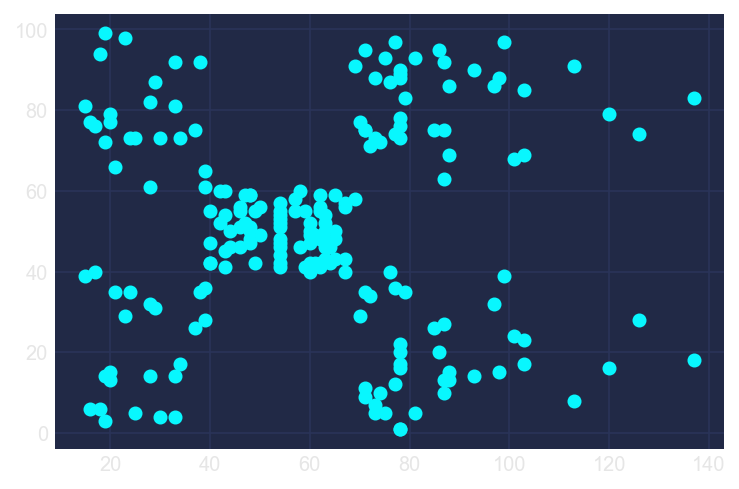

In [4]:
income = df['Annual_Income_(k$)']
spend = df['Spending_Score']

plt.scatter(income,spend)

#### แปลง data ให้คำนวณได้

In [5]:
df['female'] = np.where(df['Genre']=='Female',1,0)
df['male']   = np.where(df['Genre']=='Male',1,0)

In [11]:
X = df.drop('CustomerID',axis=1)
X = X.drop('Genre',axis=1)
X.sample(5)

Age  Annual_Income_(k$)  Spending_Score  female  male
10   67                  19              14       0     1
46   50                  40              55       1     0
8    64                  19               3       0     1
50   49                  42              52       1     0
59   53                  46              46       0     1

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X ,test_size=0.2,random_state=101)

In [86]:
kmeans = KMeans(n_clusters=5).fit(X_train)

In [87]:
X_train = X_train.copy()

In [88]:
X_train['label'] = kmeans.labels_

In [89]:
color = []
for i in X_train.label:
  if(i==0):
    color.append('red')
  elif(i==1):
    color.append('green')
  if(i==2):
    color.append('blue')
  if(i==3):
    color.append('white')
  if(i==4):
    color.append('yellow')  
X_train['color'] = color

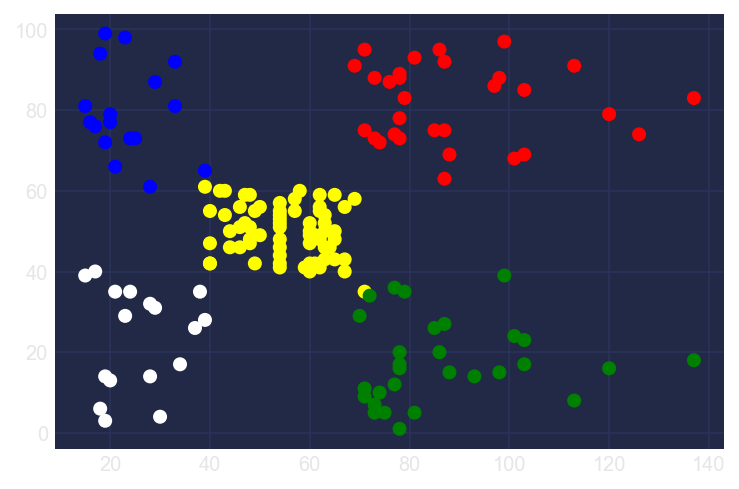

In [90]:
income = X_train['Annual_Income_(k$)']
spend = X_train['Spending_Score']
color = X_train['color']
plt.scatter(income,spend,color=color)

#### ทำการทดสอบ

In [91]:
#ทำนาย X_test
predict = kmeans.predict(X_test)

X_test = X_test.copy()
X_test['label'] = predict

color = []
for i in X_test.label:
  if(i==0):
    color.append('red')
  elif(i==1):
    color.append('green')
  if(i==2):
    color.append('blue')
  if(i==3):
    color.append('white')
  if(i==4):
    color.append('yellow')  
X_test['color'] = color

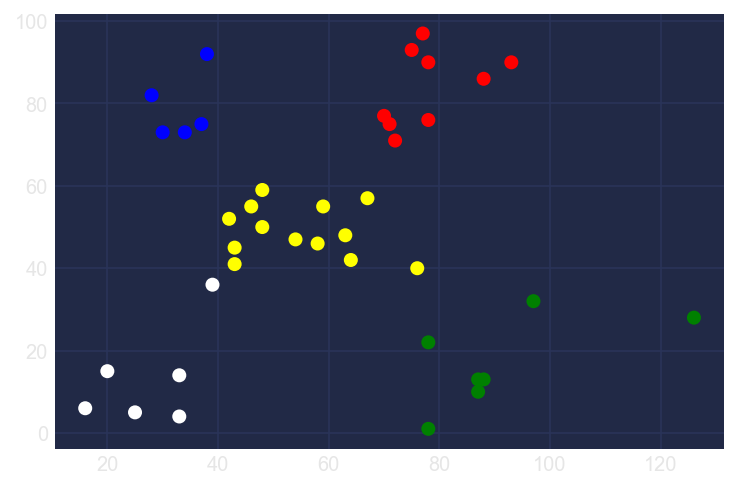

In [92]:
income = X_test['Annual_Income_(k$)']
spend = X_test['Spending_Score']
color = X_test['color']
plt.scatter(income,spend,color=color)